In [1]:
import ml_utils as mt
import pandas as pd

In [30]:
models = {}

In [28]:
df_transformed = pd.read_csv('df_transformed.csv')

In [29]:
X = df_transformed.drop(columns=['label'])
y = df_transformed['label']
X.shape, y.shape


((40432, 210), (40432,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7385928032644986
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      4016
         1.0       0.74      0.74      0.74      4071

    accuracy                           0.74      8087
   macro avg       0.74      0.74      0.74      8087
weighted avg       0.74      0.74      0.74      8087



In [34]:
train_acc = model1.score(X_train, y_train)
test_acc = model1.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.7512
Test Accuracy: 0.7386


In [35]:
models['Logistic Regression'] = model1

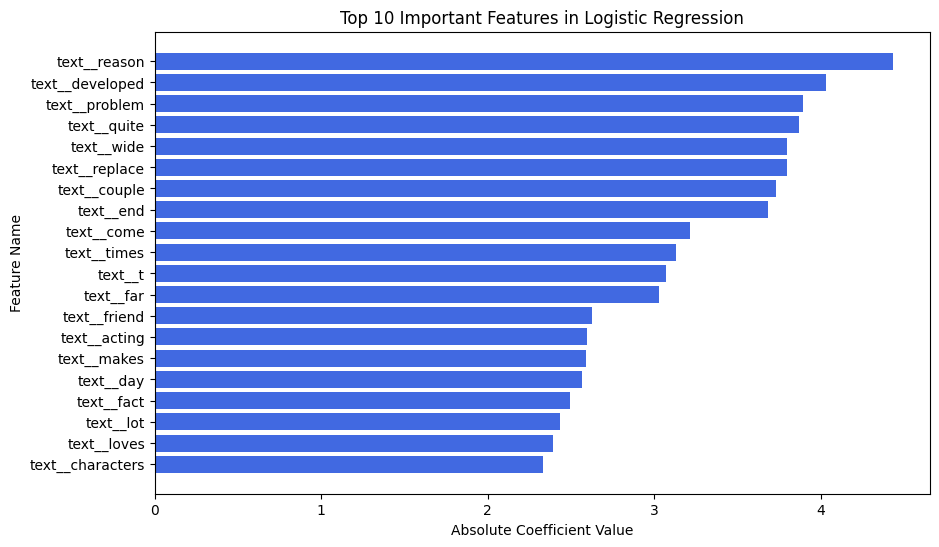

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance (coefficients)
feature_importance = model1.coef_[0]
feature_names = X_train.columns

# Sort feature importance
sorted_idx = np.argsort(np.abs(feature_importance))[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = np.abs(feature_importance)[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:20], sorted_importance[:20], color='royalblue')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features in Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


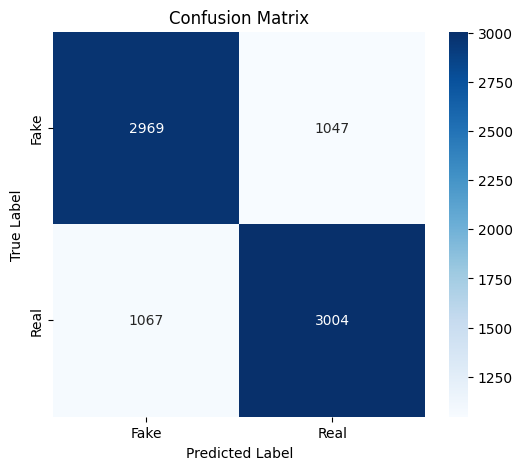

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [38]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [39]:
param_grid = {
        'n_estimators': [200, 300, 500], 
        'max_depth': [None, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}

In [40]:
model2 = RandomForestClassifier(random_state=42)

In [195]:
grid_search = RandomizedSearchCV(
    model2,
    param_grid,
    n_iter=10,
    cv=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [196]:
grid_search.fit(X_train, y_train)
mt.report(grid_search.cv_results_, n_top=5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Model with rank: 1
Mean validation score: 0.781790 (std: 0.005579)
Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.781295 (std: 0.008452)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.780398 (std: 0.007170)
Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}

Model with rank: 4
Mean validation score: 0.779285 (std: 0.006691)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}

Model with rank: 5
Mean validation score: 0.776812 (std: 0.006715)
Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}



In [41]:
model2 = RandomForestClassifier(**{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=42)

In [42]:
model2.predict(X_test)
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7875602819339681
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      4016
         1.0       0.78      0.81      0.79      4071

    accuracy                           0.79      8087
   macro avg       0.79      0.79      0.79      8087
weighted avg       0.79      0.79      0.79      8087



In [43]:
models['Random Forest'] = model2

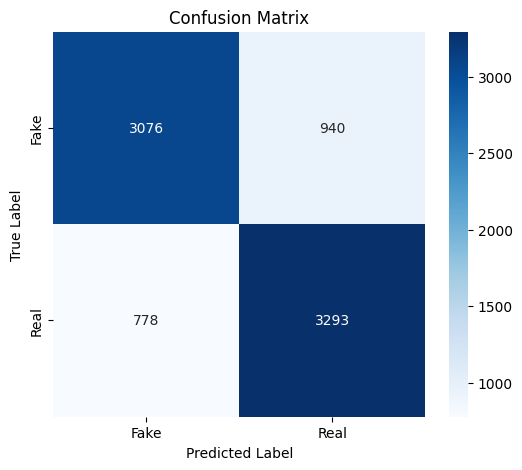

In [44]:
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model2, X, y, cv=5)
print("Cross-validation scores:", scores.mean())


Cross-validation scores: 0.7482193017127216


## Naïve Bayes Model

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

In [182]:
model3 = GaussianNB()

In [183]:
model3.fit(X_train, y_train)

# Predict on the test set
y_pred = model3.predict(X_test)

In [184]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model3, X, y, cv=skf)

In [ ]:
models['Naive Bayes'] = model3

In [185]:
scores.mean()

np.float64(0.710650339464016)

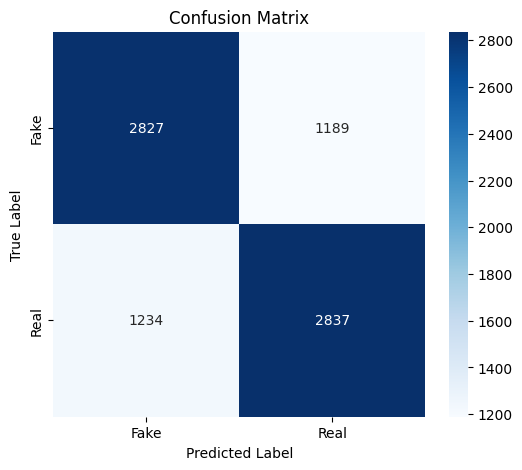

In [186]:
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [187]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores1 = cross_val_score(model1, X, y, cv=skf)

scores2 = cross_val_score(model2, X, y, cv=skf)

scores3 = cross_val_score(model3, X, y, cv=skf)

c:\Users\mradu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [188]:
print(f"Logistic Regression Mean Accuracy: {scores1.mean():.4f}")
print(f"Random Forest Mean Accuracy: {scores2.mean():.4f}")
print(f"Naïve Bayes Mean Accuracy: {scores3.mean():.4f}")

Logistic Regression Mean Accuracy: 0.7458
Random Forest Mean Accuracy: 0.7819
Naïve Bayes Mean Accuracy: 0.7107


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features


In [202]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  # Test different k values
    'weights': ['uniform', 'distance'],  # Weighting methods
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

In [203]:
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [204]:
grid_search.fit(X_scaled, y)

c:\Users\mradu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [205]:
mt.report(grid_search.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.648768 (std: 0.021597)
Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

Model with rank: 2
Mean validation score: 0.648273 (std: 0.020566)
Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

Model with rank: 3
Mean validation score: 0.648075 (std: 0.021431)
Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Model with rank: 4
Mean validation score: 0.647951 (std: 0.020902)
Parameters: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'distance'}

Model with rank: 5
Mean validation score: 0.647828 (std: 0.020429)
Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}



In [206]:
best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_scaled, y)

knn_scores = cross_val_score(best_knn, X_scaled, y, cv=10)

print("KNN Cross-Validation Accuracy:", knn_scores.mean())

KNN Cross-Validation Accuracy: 0.6492127287446303


In [ ]:
models['KNN'] = best_knn

In [18]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score

In [19]:
param_dist = {
    'max_depth': randint(3, 10),  # Depth of trees (between 3 and 10)
    'n_estimators': randint(50, 500),  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage
    'subsample': uniform(0.5, 0.5),  # Fraction of samples used for training
    'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features used per tree
    'gamma': uniform(0, 0.5)  # Minimum loss reduction for a split
}


In [20]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

In [21]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of different combinations to test
    scoring='accuracy',
    cv=10,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit Randomized Search on the data
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\Users\mradu\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:29:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BF55E1A210>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BF54D76990>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BF55ECFF50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BF55D108F0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [22]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'colsample_bytree': np.float64(0.6632703844029177), 'gamma': np.float64(0.2852219872026997), 'learning_rate': np.float64(0.1662502780077471), 'max_depth': 8, 'n_estimators': 345, 'subsample': np.float64(0.9222669243390758)}
Best Score: 0.7943727149423772


In [23]:
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)

Final Model Accuracy: 0.7975763571163595


In [ ]:
models['XGBoost'] = best_xgb

In [27]:
print(f"Final Model Accuracy: {accuracy:.4f}")

Final Model Accuracy: 0.7976
